# Gender Differences in University Enrollment

## Introduction

The objective of this program is to practice visualizing data. For this I have used the 'Universities.csv' data from [National Center for Education Statistics](https://nces.ed.gov/ipeds/datacenter/DataFiles.aspx). 

This data although named 'Universities.csv' actually and mainly contains the number of male and female enrolments in each university. 

At first one might say, "so what, just a number, what can be we do with this?". Well, with proper data analysis and visualization, we can read, understand and highlight important data. 

Although not complete, the below steps are taken to do the same.


## Data Preparation

In [139]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [140]:
import numpy as np
import pandas as pd

In [141]:
c = students = pd.read_csv('https://raw.githubusercontent.com/mschermann/msis2802winter2018homework/master/\
universities.csv')

In [142]:
import seaborn as sn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [143]:
uswest = ['AK','AZ','CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

Above is an array containing all the states that belong to US-West.

Since I live in California, I'm being a little selfish to gather data about the US-west.

In [144]:
students = students.dropna()

There are a lot of rows, that have null values in the data set. Due to this, dropna() function was used to drop all the NaN values such that it does not cause either errors or pose as an outlier in visualizations.

### Total Enrollment Per State

Filtering out only US-West states from the main database, I grouped by state and used the agg() function to calculate the mean, cound, min and max. I also sorted the values based on descending order of count.

Using the data, I created a box plot. So lets see what we find.

For boxplot I referred to the below links
- https://seaborn.pydata.org/generated/seaborn.boxplot.html


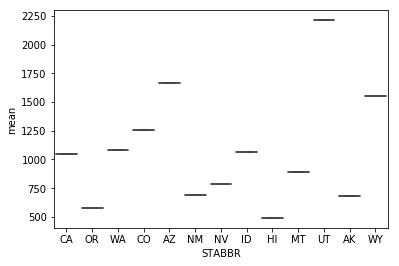

In [145]:
students_uswest = students[students['STABBR'].isin(uswest)]
students_plot = students_uswest.groupby('STABBR', as_index=False)['ENRLT'].agg(['mean', 'count','max','min']).reset_index().sort_values('count',ascending=False)
sn.boxplot(y='mean', x='STABBR', data=students_plot);

### Observation

Box Plots are really useful when you want to plot a range of values. 

From the box plot above, we can see that California has highest number of universities and Wyoming as the lowest number of universities in the US-West region. Although the highest, the average of total enrollment is lower than that of Wyoming. 
One can say that from this data, there is a higher acceptance rate in universities in Wyoming compared to that of California. 

Another observation here is that Utah has the highest average compared to all the other states.

But can we be assure of this assumptions? No, we need more information and hard data to conclude that observation.



### Gender based on Enrollment 

Now that we have seen and compared the average enrollment into universities in US-West region states, lets deep dive further into the comparision of male/female enrollments.

For this section I referred to MELT method in this https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html link.

Since the main dataset has values of enrollment in separate columns for both male and female, I used this function to melt both these columns to forge a new column that contains both male and female values.

The main reason for this was to create a box plot to compare the two.

In [146]:
student_melt = pd.melt(students_uswest, id_vars=['STABBR', 'INSTNM'], value_vars=['ENRLM', 'ENRLW'],var_name='Enrollment Gender wise', value_name='Enrollment')
student_melt.head()

,STABBR,INSTNM,Enrollment Gender wise,Enrollment
0,AK,University of Alaska Anchorage,ENRLM,776.0
1,AK,University of Alaska Fairbanks,ENRLM,392.0
2,AK,University of Alaska Southeast,ENRLM,59.0
3,AK,Alaska Pacific University,ENRLM,15.0
4,AZ,Carrington College-Phoenix North,ENRLM,15.0


The above is a new data frame created using the melt method, which contains the university names, states, column for gender and the Enrollment for male/female for each university.

To change the figure size I referred to the below link.
- https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot

I also tried to search for labelling the boxplot to show better values but wasn't able to accomplish that. I instead used showmeans to show the mean value for each box plot
- https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value

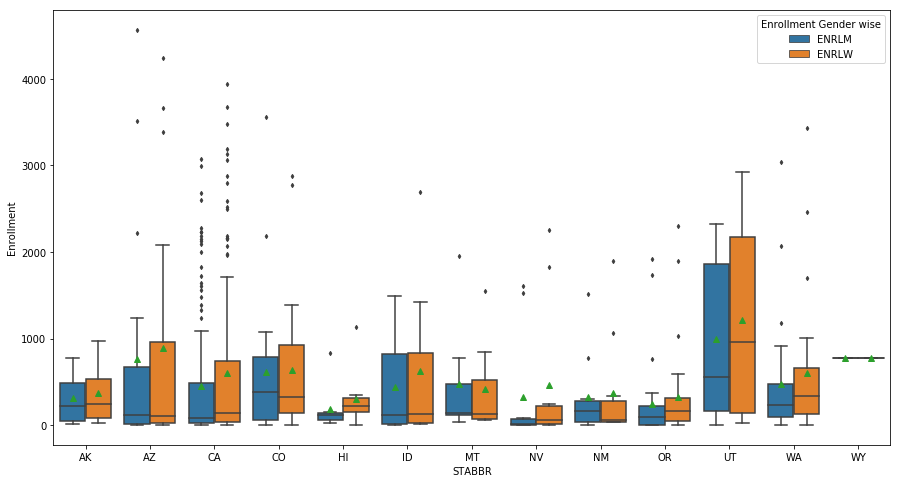

In [147]:
plt.figure(figsize=(15,8))
sn.boxplot(x='STABBR', hue='Enrollment Gender wise', y='Enrollment', data=student_melt, fliersize=3, showmeans = True);

### Observation

Although previously we found out that the average total enrollment was high for Wyoming, from this plot we can easily see that Wyoming has just 1 university, and thats why it seems like the average is high compared to california. 

From this plot we can see that in general, there are higher women enrollees than men from this data. The green triangles in the plot for each box indicates the mean, and shows that for each state the mean of women enrollees is higher than men enrollees.

But an observation here that supports the previous observation is that Utah has higher enrollment in general. 

Can we say that more women are interested in education compared to men? No, again without hard facts and more data, we cannot come to this conclusion. And according to this box plot there are many outliers with which we cannot confirm certain details.


### Standardized Ratio of Admission

In this section I have decided to analyse the the ratio of admissions for men and women in the Bay Area. 

Firstly I am only choosing thoese universities that have 1000 and more than 1000 enrollments.

I have standardized the ratio with the mean in the following way:

- Mean ratio = Mean_adm_men/Mean_adm_women

- For each university divide the ratio of men/women by this mean ratio

There are different ways of doing the ratio and for any given formula we can just change logic to do the same. Once we have the standardized ratio we can do a plot ascending order.


###### Why have I standardized this?

Because, universities in the Bay Area are different compared to each other in terms of size, rank, admission rate etc. So to make it comparable, we have to standardize the ratio of admission of men to that of women.

For this section I learned about barplot from the below links:
- https://seaborn.pydata.org/generated/seaborn.barplot.html
- https://stackoverflow.com/questions/31859285/rotate-tick-labels-for-seaborn-barplot/31861477
- https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas


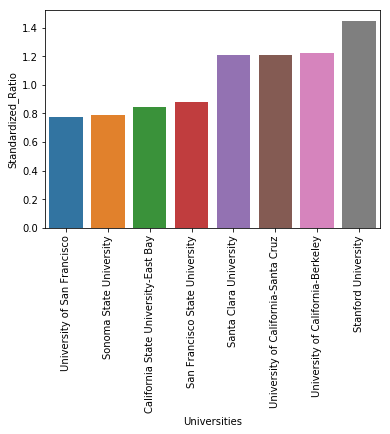

In [148]:
students_bayarea = students[(students['ZIP'].str.startswith(('950','94')))  & (students['ENRLT'] > 999)].copy()

mean_ratio = students_bayarea['ADMSSNM'].mean()/students_bayarea['ADMSSNW'].mean()

students_bayarea['Standardized_Ratio'] = ((students['ADMSSNM']/students['ADMSSNW'])/mean_ratio)

students_bayarea = students_bayarea.sort_values('Standardized_Ratio',ascending=True)
   
students_bayarea = students_bayarea.rename(columns={'INSTNM': 'Universities'})

sn.barplot(x='Universities', y='Standardized_Ratio', data=students_bayarea).set_xticklabels(students_bayarea['Universities'], rotation=90);

### Observation

The plot is of universities with more than 1000 enrollments. And since these are standardized they can be compared. From this plot we can see that 4 universities have higher rate of enrollment for men with Stanfor Universities having the higher rate.
And 4 universities having higher rate of enrollment for woment with University of San Francisco having the higher rate.

We can make assumptions like there are more women in certain areas whereas men in others OR that some universities give admission to more women than men or vice versa as protocol. 

But we cannot conclude any of these assumptions, as said before, we need more data and hard facts. Moreover we do not know which year or timeline this data belongs to or a generic base year.


## Conclusion

- California has most number of universities in the US-West region.
- Utah as a state has the highest total enrollment and the highest gender enrollment in the US-West region.
- Unlike history, many universities have started accepting large number of women students.
- In California, Stanford University has the highest men to women admission ratio where as University of San Francisco has the highest women to men admission ratio.